# RESNET

#### import

In [1]:
from data_generator import load_dataset
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
import random
import cv2
import numpy as np

#### load dataset

In [2]:
x_train, y_train, x_test, y_test = load_dataset((64, 64))
class_names = ["combinations", "healthy", "rust", "scrab"]

Plant Health dataset downloading.
Directory ./data/ already exist.
Dataset already install.
Load plant image names and pathologies.
Load plant images.
Creation of the final dataset.


In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1547, 64, 64, 3), (1547,), (274, 64, 64, 3), (274,))

#### functions

In [3]:
def plot_sample(class_names, train_images, train_label, augm=None):
    
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = 5

    for i in range(1, columns * rows +1):
        
        if augm is not None:
            img = augm.random_transform(train_images[i])
        else:
            img = train_images[i]

        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        
    plt.show()

In [4]:
def history_model(history, modelName):
  
    plt.subplot(121)
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title(modelName + ' Accuracy')
    plt.ylabel('sparse_categorical_accuracy')
    plt.xlabel('epochs')
    plt.ylim([0.0,1.0])
    plt.legend(['train_accuracy', 'val_sparse_categorical_accuracy'])

    plt.subplot(122)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title(modelName + ' Loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.ylim([0.0,3.0])
    plt.legend(['train_loss', 'val_loss'])

    plt.show()

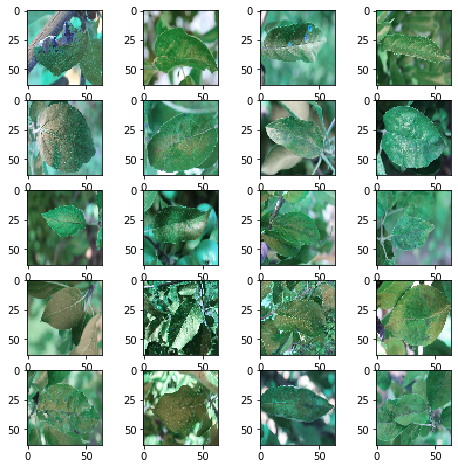

In [5]:
plot_sample(class_names, x_train, y_train)

#### initialisation

In [6]:
EPOCHS=100
BATCH_SIZE=256

#### Resnet 3 blocks 2 conv

In [26]:
def create_model(x_shape):
    
    input = Input(x_shape, name="input")

    conv_0 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_0")(input)
    pool_0 = MaxPooling2D(pool_size=(2, 2), name='pool_0')(conv_0)

    conv_1 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_1")(pool_0)
    conv_2 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_2")(conv_1)
    output_1 = Add(name='add_1')([pool_0, conv_2])

    conv_3 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_3")(output_1)
    conv_4 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_4")(conv_3)
    output_2 = Add(name='add_2')([output_1, conv_4])

    conv_5 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_5")(output_2)
    conv_6 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_6")(conv_5)
    output_3 = Add(name='add_3')([output_2, conv_6])
    

    pooling = GlobalAveragePooling2D(name='globalAveragePooling2D')(output_3)

    flatten = Flatten(name="flatten")(pooling)
    fc_1 = Dense(128, activation='relu', name='fully_connected')(flatten)  
    output = Dense(4, activation='softmax', name='output')(fc_1)
    model = Model(input, output)
    
    return model

In [27]:
model = create_model(x_train.shape[1:])
model.summary()
model.compile(
  optimizer=Adam(learning_rate=0.001),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'],
)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv_0 (Conv2D)                 (None, 64, 64, 64)   1792        input[0][0]                      
__________________________________________________________________________________________________
pool_0 (MaxPooling2D)           (None, 32, 32, 64)   0           conv_0[0][0]                     
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 32, 32, 64)   36928       pool_0[0][0]                     
____________________________________________________________________________________________

In [28]:
history = model.fit(x_train, y_train , epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data=(x_test, y_test))

Train on 1547 samples, validate on 274 samples
Epoch 1/100
1547/1547 [==============================] - 21s 14ms/sample - loss: 27.7137 - sparse_categorical_accuracy: 0.2793 - val_loss: 8.0659 - val_sparse_categorical_accuracy: 0.3905
Epoch 2/100
1547/1547 [==============================] - 23s 15ms/sample - loss: 6.5859 - sparse_categorical_accuracy: 0.3659 - val_loss: 4.2418 - val_sparse_categorical_accuracy: 0.3577
Epoch 3/100
1547/1547 [==============================] - 23s 15ms/sample - loss: 3.7401 - sparse_categorical_accuracy: 0.3458 - val_loss: 2.9936 - val_sparse_categorical_accuracy: 0.3832
Epoch 4/100
1547/1547 [==============================] - 23s 15ms/sample - loss: 2.1947 - sparse_categorical_accuracy: 0.3303 - val_loss: 2.3504 - val_sparse_categorical_accuracy: 0.3102
Epoch 5/100
1547/1547 [==============================] - 22s 14ms/sample - loss: 1.7302 - sparse_categorical_accuracy: 0.3672 - val_loss: 1.4543 - val_sparse_categorical_accuracy: 0.4307
Epoch 6/100
1547/

Epoch 88/100
1547/1547 [==============================] - 23s 15ms/sample - loss: 1.1801 - sparse_categorical_accuracy: 0.4428 - val_loss: 1.1190 - val_sparse_categorical_accuracy: 0.4489
Epoch 89/100
1547/1547 [==============================] - 22s 14ms/sample - loss: 1.0762 - sparse_categorical_accuracy: 0.5184 - val_loss: 1.1092 - val_sparse_categorical_accuracy: 0.5036
Epoch 90/100
1547/1547 [==============================] - 22s 14ms/sample - loss: 1.0752 - sparse_categorical_accuracy: 0.5339 - val_loss: 1.1371 - val_sparse_categorical_accuracy: 0.4818
Epoch 91/100
1547/1547 [==============================] - 22s 14ms/sample - loss: 1.1059 - sparse_categorical_accuracy: 0.4809 - val_loss: 1.1740 - val_sparse_categorical_accuracy: 0.4708
Epoch 92/100
1547/1547 [==============================] - 22s 14ms/sample - loss: 1.1195 - sparse_categorical_accuracy: 0.4745 - val_loss: 1.2107 - val_sparse_categorical_accuracy: 0.4088
Epoch 93/100
1547/1547 [==============================] - 23

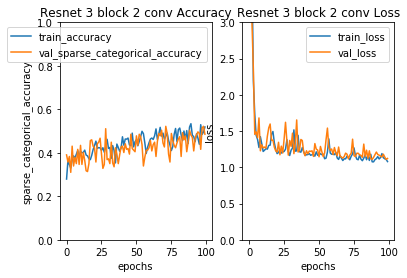

In [29]:
history_model(history.history, "Resnet 3 block 2 conv")

In [33]:
prediction((64, 64), model, "predict_resnet_3_2.csv")

Load test images names.
Load plant test images.
Genrerate predictions.
Generate answer file: ./output/predict_resnet_3_2.csv.


#### Resnet 5 block 2 conv

In [12]:
def create_model(x_shape):
    
    input = Input(x_shape, name="input")

    conv_0 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_0")(input)
    pool_0 = MaxPooling2D(pool_size=(2, 2), name='pool_0')(conv_0)

    conv_1 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_1")(pool_0)
    conv_2 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_2")(conv_1)
    output_1 = Add(name='add_1')([pool_0, conv_2])

    conv_3 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_3")(output_1)
    conv_4 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_4")(conv_3)
    output_2 = Add(name='add_2')([output_1, conv_4])

    conv_5 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_5")(output_2)
    conv_6 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_6")(conv_5)
    output_3 = Add(name='add_3')([output_2, conv_6])

    conv_7 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_7")(output_3)
    conv_8 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_8")(conv_7)
    output_4 = Add(name='add_4')([output_3, conv_8])
    
    conv_9 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_9")(output_4)
    conv_10 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_10")(conv_9)
    output_5 = Add(name='add_5')([output_4, conv_10])

    pooling = GlobalAveragePooling2D(name='globalAveragePooling2D')(output_5)

    flatten = Flatten(name="flatten")(pooling)
    fc_1 = Dense(128, activation='relu', name='fully_connected')(flatten)
    output = Dense(4, activation='softmax', name='output')(fc_1)
    model = Model(input, output)
    
    return model
    

In [13]:
model = create_model(x_train.shape[1:])
model.summary()
model.compile(
  optimizer=Adam(learning_rate=0.001),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'],
)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv_0 (Conv2D)                 (None, 64, 64, 64)   1792        input[0][0]                      
__________________________________________________________________________________________________
pool_0 (MaxPooling2D)           (None, 32, 32, 64)   0           conv_0[0][0]                     
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 32, 32, 64)   36928       pool_0[0][0]                     
______________________________________________________________________________________________

In [14]:
history = model.fit(x_train, y_train , epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data=(x_test, y_test))

Train on 1547 samples, validate on 274 samples
Epoch 1/100
1547/1547 [==============================] - 35s 22ms/sample - loss: 79.9067 - sparse_categorical_accuracy: 0.2857 - val_loss: 24.0616 - val_sparse_categorical_accuracy: 0.3212
Epoch 2/100
1547/1547 [==============================] - 35s 23ms/sample - loss: 16.0876 - sparse_categorical_accuracy: 0.3620 - val_loss: 4.7786 - val_sparse_categorical_accuracy: 0.3102
Epoch 3/100
1547/1547 [==============================] - 36s 23ms/sample - loss: 4.0639 - sparse_categorical_accuracy: 0.3077 - val_loss: 2.4245 - val_sparse_categorical_accuracy: 0.3467
Epoch 4/100
1547/1547 [==============================] - 35s 23ms/sample - loss: 2.2799 - sparse_categorical_accuracy: 0.3290 - val_loss: 2.4805 - val_sparse_categorical_accuracy: 0.3102
Epoch 5/100
1547/1547 [==============================] - 36s 23ms/sample - loss: 1.7987 - sparse_categorical_accuracy: 0.3226 - val_loss: 1.5013 - val_sparse_categorical_accuracy: 0.2810
Epoch 6/100
154

Epoch 88/100
1547/1547 [==============================] - 35s 23ms/sample - loss: 1.0585 - sparse_categorical_accuracy: 0.5475 - val_loss: 1.1425 - val_sparse_categorical_accuracy: 0.4672
Epoch 89/100
1547/1547 [==============================] - 35s 23ms/sample - loss: 1.1223 - sparse_categorical_accuracy: 0.5055 - val_loss: 1.1197 - val_sparse_categorical_accuracy: 0.5000
Epoch 90/100
1547/1547 [==============================] - 35s 23ms/sample - loss: 1.1061 - sparse_categorical_accuracy: 0.5120 - val_loss: 1.1358 - val_sparse_categorical_accuracy: 0.4818
Epoch 91/100
1547/1547 [==============================] - 35s 23ms/sample - loss: 1.0691 - sparse_categorical_accuracy: 0.5268 - val_loss: 1.1686 - val_sparse_categorical_accuracy: 0.4818
Epoch 92/100
1547/1547 [==============================] - 35s 23ms/sample - loss: 1.0497 - sparse_categorical_accuracy: 0.5591 - val_loss: 1.1428 - val_sparse_categorical_accuracy: 0.4964
Epoch 93/100
1547/1547 [==============================] - 36

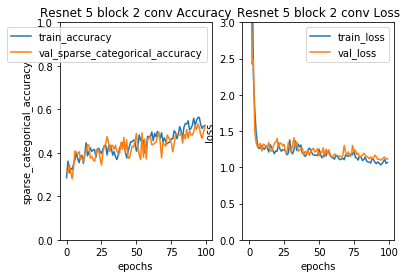

In [15]:
history_model(history.history, "Resnet 5 block 2 conv")

In [39]:
prediction((64, 64), model, "predict_resnet_5_2.csv")

Load test images names.
Load plant test images.
Genrerate predictions.
Generate answer file: ./output/predict_resnet_5_2.csv.


#### Resnet 5 blocks 2 conv with dropout

In [8]:
def create_model(x_shape):
    
    dropout_rate = 0.1

    input = Input(x_shape, name="input")

    conv_0 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_0")(input)
    pool_0 = MaxPooling2D(pool_size=(2, 2), name='pool_0')(conv_0)

    conv_1 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_1")(pool_0)
    dropout_1 = Dropout(dropout_rate, name='dropout_1')(conv_1)
    conv_2 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_2")(dropout_1)
    dropout_2 = Dropout(dropout_rate, name='dropout_2')(conv_2)
    output_1 = Add(name='add_1')([pool_0, dropout_2])

    conv_3 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_3")(output_1)
    dropout_3 = Dropout(dropout_rate, name='dropout_3')(conv_3)
    conv_4 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_4")(dropout_3)
    dropout_4 = Dropout(dropout_rate, name='dropout_4')(conv_4)
    output_2 = Add(name='add_2')([output_1, dropout_4])

    conv_5 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_5")(output_2)
    dropout_5 = Dropout(dropout_rate, name='dropout_5')(conv_5)
    conv_6 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_6")(dropout_5)
    dropout_6 = Dropout(dropout_rate, name='dropout_6')(conv_6)
    output_3 = Add(name='add_3')([output_2, dropout_6])

    conv_7 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_7")(output_3)
    dropout_7 = Dropout(dropout_rate, name='dropout_7')(conv_7)
    conv_8 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_8")(dropout_7)
    dropout_8 = Dropout(dropout_rate, name='dropout_8')(conv_8)
    output_4 = Add(name='add_4')([output_3, dropout_8])
    
    conv_9 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_9")(output_4)
    dropout_9 = Dropout(dropout_rate, name='dropout_9')(conv_9)
    conv_10 = Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='SAME', name="conv_10")(dropout_9)
    dropout_10 = Dropout(dropout_rate, name='dropout_10')(conv_10)
    output_5 = Add(name='add_5')([output_4, dropout_10])

    pooling = GlobalAveragePooling2D(name='globalAveragePooling2D')(output_5)

    flatten = Flatten(name="flatten")(pooling)
    fc_1 = Dense(128, activation='relu', name='fully_connected')(flatten)
    dropout_fc = Dropout(dropout_rate, name='dropout_fc')(fc_1)    
    output = Dense(4, activation='softmax', name='output')(dropout_fc)
    model = Model(input, output)
    
    return model

In [9]:
model = create_model(x_train.shape[1:])
model.summary()

model.compile(
  optimizer=Adam(learning_rate=0.001),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'],
)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv_0 (Conv2D)                 (None, 64, 64, 64)   1792        input[0][0]                      
__________________________________________________________________________________________________
pool_0 (MaxPooling2D)           (None, 32, 32, 64)   0           conv_0[0][0]                     
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 32, 32, 64)   36928       pool_0[0][0]                     
______________________________________________________________________________________________

In [10]:
history = model.fit(x_train, y_train , epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data=(x_test, y_test))

Train on 1547 samples, validate on 274 samples
Epoch 1/100
1547/1547 [==============================] - 51s 33ms/sample - loss: 46.8143 - sparse_categorical_accuracy: 0.3167 - val_loss: 11.6075 - val_sparse_categorical_accuracy: 0.3102
Epoch 2/100
1547/1547 [==============================] - 50s 32ms/sample - loss: 9.2026 - sparse_categorical_accuracy: 0.2870 - val_loss: 4.6881 - val_sparse_categorical_accuracy: 0.3504
Epoch 3/100
1547/1547 [==============================] - 50s 33ms/sample - loss: 4.5708 - sparse_categorical_accuracy: 0.3193 - val_loss: 1.4669 - val_sparse_categorical_accuracy: 0.3723
Epoch 4/100
1547/1547 [==============================] - 50s 32ms/sample - loss: 3.1457 - sparse_categorical_accuracy: 0.3387 - val_loss: 1.8275 - val_sparse_categorical_accuracy: 0.3102
Epoch 5/100
1547/1547 [==============================] - 50s 32ms/sample - loss: 2.6354 - sparse_categorical_accuracy: 0.3193 - val_loss: 1.6819 - val_sparse_categorical_accuracy: 0.3686
Epoch 6/100
1547

Epoch 88/100
1547/1547 [==============================] - 50s 33ms/sample - loss: 0.7327 - sparse_categorical_accuracy: 0.7195 - val_loss: 0.8184 - val_sparse_categorical_accuracy: 0.6934
Epoch 89/100
1547/1547 [==============================] - 50s 32ms/sample - loss: 0.7357 - sparse_categorical_accuracy: 0.7253 - val_loss: 0.9017 - val_sparse_categorical_accuracy: 0.6861
Epoch 90/100
1547/1547 [==============================] - 50s 32ms/sample - loss: 0.7170 - sparse_categorical_accuracy: 0.7337 - val_loss: 0.8453 - val_sparse_categorical_accuracy: 0.6861
Epoch 91/100
1547/1547 [==============================] - 50s 33ms/sample - loss: 0.6690 - sparse_categorical_accuracy: 0.7453 - val_loss: 0.8161 - val_sparse_categorical_accuracy: 0.6752
Epoch 92/100
1547/1547 [==============================] - 51s 33ms/sample - loss: 0.7257 - sparse_categorical_accuracy: 0.7207 - val_loss: 0.8744 - val_sparse_categorical_accuracy: 0.6715
Epoch 93/100
1547/1547 [==============================] - 50

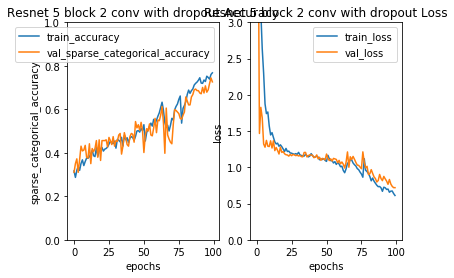

In [11]:
history_model(history.history, "Resnet 5 block 2 conv with dropout")

In [ ]:
prediction((64, 64), model, "predict_resnet_5_2_dp.csv")

#### batch normalisation

In [20]:
def create_table(x_shape):
    
    dropout_rate = 0.1
    
    input = Input(x_shape, name="input")

    conv_0 = Conv2D(64, kernel_size=3,  strides=1, padding='SAME', name="conv_0")(input)
    batch_norm_0 = BatchNormalization(name='batch_norm_0')(conv_0)
    relu_0 = Activation('relu', name='relu_0')(batch_norm_0)

    # first block
    conv_1 = Conv2D(64, kernel_size=3,  strides=1, padding='SAME', name="conv_1")(relu_0)
    batch_norm_1 = BatchNormalization(name='batch_norm_1')(conv_1)
    relu_1 = Activation('relu', name='relu_1')(batch_norm_1)
    dropout_1 = Dropout(dropout_rate, name='dropout_1')(relu_1)
    conv_2 = Conv2D(64, kernel_size=3,  strides=1, padding='SAME', name="conv_2")(dropout_1)
    batch_norm_2 = BatchNormalization(name='batch_norm_2')(conv_2)
    relu_2 = Activation('relu', name='relu_2')(batch_norm_2)
    dropout_2 = Dropout(dropout_rate, name='dropout_2')(relu_2)

    output_1 = Add(name='add_1')([relu_0, dropout_2])
    
    # second block
    conv_3 = Conv2D(64, kernel_size=3,  strides=1, padding='SAME', name="conv_3")(output_1)
    batch_norm_3 = BatchNormalization(name='batch_norm_3')(conv_3)
    relu_3 = Activation('relu', name='relu_3')(batch_norm_3)
    dropout_3 = Dropout(dropout_rate, name='dropout_3')(relu_3)
    conv_4 = Conv2D(64, kernel_size=3,  strides=1, padding='SAME', name="conv_4")(dropout_3)
    batch_norm_4 = BatchNormalization(name='batch_norm_4')(conv_4)
    relu_4 = Activation('relu', name='relu_4')(batch_norm_4)
    dropout_4 = Dropout(dropout_rate, name='dropout_4')(relu_4)
    
    output_2 = Add(name='add_2')([output_1, dropout_4])

    # third block
    conv_5 = Conv2D(64, kernel_size=3,  strides=1, padding='SAME', name="conv_5")(output_2)
    batch_norm_5 = BatchNormalization(name='batch_norm_5')(conv_5)
    relu_5 = Activation('relu', name='relu_5')(batch_norm_5)
    dropout_5 = Dropout(dropout_rate, name='dropout_5')(relu_5)
    conv_6 = Conv2D(64, kernel_size=3,  strides=1, padding='SAME', name="conv_6")(dropout_5)
    batch_norm_6 = BatchNormalization(name='batch_norm_6')(conv_6)
    relu_6 = Activation('relu', name='relu_6')(batch_norm_6)
    dropout_6 = Dropout(dropout_rate, name='dropout_6')(relu_6)

    output_3 = Add(name='add_3')([output_2, dropout_6])
    
    # fourth block
    conv_7 = Conv2D(64, kernel_size=3,  strides=1, padding='SAME', name="conv_7")(output_3)
    batch_norm_7 = BatchNormalization(name='batch_norm_7')(conv_7)
    relu_7 = Activation('relu', name='relu_7')(batch_norm_7)
    dropout_7 = Dropout(dropout_rate, name='dropout_7')(relu_7)
    conv_8 = Conv2D(64, kernel_size=3,  strides=1, padding='SAME', name="conv_8")(dropout_7)
    batch_norm_8 = BatchNormalization(name='batch_norm_8')(conv_8)
    relu_8 = Activation('relu', name='relu_8')(batch_norm_8)
    dropout_8 = Dropout(dropout_rate, name='dropout_8')(relu_8)

    output_4 = Add(name='add_4')([output_3, dropout_8])


    # fifth block
    conv_9 = Conv2D(64, kernel_size=3,  strides=1, padding='SAME', name="conv_9")(output_4)
    batch_norm_9 = BatchNormalization(name='batch_norm_9')(conv_9)
    relu_9 = Activation('relu', name='relu_9')(batch_norm_9)
    dropout_9 = Dropout(dropout_rate, name='dropout_9')(relu_9)
    conv_10 = Conv2D(64, kernel_size=3,  strides=1, padding='SAME', name="conv_10")(dropout_9)
    batch_norm_10 = BatchNormalization(name='batch_norm_10')(conv_10)
    relu_10 = Activation('relu', name='relu_10')(batch_norm_10)
    dropout_10 = Dropout(dropout_rate, name='dropout_10')(relu_10)

    output_5 = Add(name='add_5')([output_4, dropout_10])


    pooling = AveragePooling2D(name='AveragePooling2D')(output_5)

    flatten = Flatten(name="flatten")(pooling)
    fc_1 = Dense(128, activation='relu', name='fully_connected')(flatten)
    dropout = Dropout(dropout_rate, name='dropout')(fc_1)    
    output = Dense(4, activation='softmax', name='output')(dropout)
    model = Model(input, output)
    
    return model

In [21]:
model = create_model(x_train.shape[1:])
model.summary()

model.compile(
  optimizer=Adam(learning_rate=0.001),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'],
)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv_0 (Conv2D)                 (None, 64, 64, 64)   1792        input[0][0]                      
__________________________________________________________________________________________________
pool_0 (MaxPooling2D)           (None, 32, 32, 64)   0           conv_0[0][0]                     
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 32, 32, 64)   36928       pool_0[0][0]                     
____________________________________________________________________________________________

In [23]:
history = model.fit(x_train, y_train , epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data=(x_test, y_test))

Train on 1547 samples, validate on 274 samples
Epoch 1/100
1547/1547 [==============================] - 48s 31ms/sample - loss: 9.3050 - sparse_categorical_accuracy: 0.2864 - val_loss: 3.5182 - val_sparse_categorical_accuracy: 0.2810
Epoch 2/100
1547/1547 [==============================] - 50s 32ms/sample - loss: 5.4807 - sparse_categorical_accuracy: 0.3142 - val_loss: 2.3943 - val_sparse_categorical_accuracy: 0.3139
Epoch 3/100
1547/1547 [==============================] - 50s 33ms/sample - loss: 3.8207 - sparse_categorical_accuracy: 0.2896 - val_loss: 1.5137 - val_sparse_categorical_accuracy: 0.3139
Epoch 4/100
1547/1547 [==============================] - 50s 32ms/sample - loss: 2.8621 - sparse_categorical_accuracy: 0.3103 - val_loss: 1.5366 - val_sparse_categorical_accuracy: 0.3248
Epoch 5/100
1547/1547 [==============================] - 50s 32ms/sample - loss: 2.3073 - sparse_categorical_accuracy: 0.3542 - val_loss: 1.4020 - val_sparse_categorical_accuracy: 0.3467
Epoch 6/100
1547/1

Epoch 88/100
1547/1547 [==============================] - 50s 33ms/sample - loss: 0.6373 - sparse_categorical_accuracy: 0.7505 - val_loss: 0.6524 - val_sparse_categorical_accuracy: 0.7482
Epoch 89/100
1547/1547 [==============================] - 51s 33ms/sample - loss: 0.5765 - sparse_categorical_accuracy: 0.7815 - val_loss: 0.7056 - val_sparse_categorical_accuracy: 0.7336
Epoch 90/100
1547/1547 [==============================] - 51s 33ms/sample - loss: 0.5700 - sparse_categorical_accuracy: 0.7731 - val_loss: 0.6661 - val_sparse_categorical_accuracy: 0.7336
Epoch 91/100
1547/1547 [==============================] - 50s 32ms/sample - loss: 0.5798 - sparse_categorical_accuracy: 0.7738 - val_loss: 0.8579 - val_sparse_categorical_accuracy: 0.6788
Epoch 92/100
1547/1547 [==============================] - 51s 33ms/sample - loss: 0.6165 - sparse_categorical_accuracy: 0.7563 - val_loss: 0.6634 - val_sparse_categorical_accuracy: 0.7299
Epoch 93/100
1547/1547 [==============================] - 50

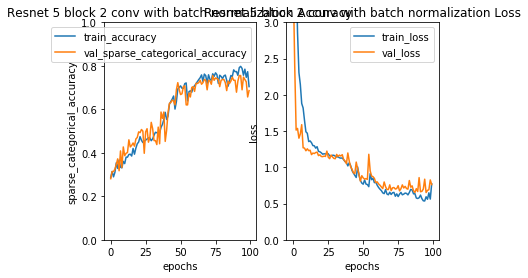

In [26]:
history_model(history.history, "Resnet 5 block 2 conv with batch normalization")

In [ ]:
prediction((64, 64), model, "predict_resnet_5_2_bm.csv")